# Import Statements

In [1]:
import os
os.chdir('../../geodata')

import pandas as pd
import numpy as np
import pickle

from shapely.ops import cascaded_union
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import geoplot

# Load from pickle

In [2]:
os.chdir('../india_RE_transition/data/pickle')

# state shapes
file = open("states.pickle",'rb')
states = pickle.load(file)
file.close()
# grid state shapes
file = open("grid_states.pickle",'rb')
grid_states = pickle.load(file)
file.close()
# state heatmap data
file = open("wind_cf_summary_30.pickle",'rb')
wind_cf_summary_30 = pickle.load(file)
file.close()
file = open("wind_lcoe_summary_30.pickle",'rb')
wind_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("solar_cf_summary_30.pickle",'rb')
solar_cf_summary_30 = pickle.load(file)
file.close()
file = open("solar_lcoe_summary_30.pickle",'rb')
solar_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("wind_cf_summary_47.pickle",'rb')
wind_cf_summary_47 = pickle.load(file)
file.close()
file = open("wind_lcoe_summary_47.pickle",'rb')
wind_lcoe_summary_47 = pickle.load(file)
file.close()
file = open("solar_cf_summary_47.pickle",'rb')
solar_cf_summary_47 = pickle.load(file)
file.close()
file = open("solar_lcoe_summary_47.pickle",'rb')
solar_lcoe_summary_47 = pickle.load(file)
file.close()
# grid heatmap data
file = open("grid_wind_cf_summary_30.pickle",'rb')
grid_wind_cf_summary_30 = pickle.load(file)
file.close()
file = open("grid_wind_lcoe_summary_30.pickle",'rb')
grid_wind_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("grid_solar_cf_summary_30.pickle",'rb')
grid_solar_cf_summary_30 = pickle.load(file)
file.close()
file = open("grid_solar_lcoe_summary_30.pickle",'rb')
grid_solar_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("grid_wind_cf_summary_47.pickle",'rb')
grid_wind_cf_summary_47 = pickle.load(file)
file.close()
file = open("grid_wind_lcoe_summary_47.pickle",'rb')
grid_wind_lcoe_summary_47 = pickle.load(file)
file.close()
file = open("grid_solar_cf_summary_47.pickle",'rb')
grid_solar_cf_summary_47 = pickle.load(file)
file.close()
file = open("grid_solar_lcoe_summary_47.pickle",'rb')
grid_solar_lcoe_summary_47 = pickle.load(file)
file.close()

os.chdir('../../outputs/plots')

In [3]:
cmap = cm.RdBu
cmap_reversed = cm.get_cmap('RdBu_r')

# State Averages EDA

In [4]:
missing = states.keys() - set(wind_cf_summary_30.index)

for state in missing:
    wind_cf_summary_30.loc[state] = 0
    wind_cf_summary_47.loc[state] = 0
    wind_lcoe_summary_30.loc[state] = 0
    wind_lcoe_summary_47.loc[state] = 0
    solar_cf_summary_30.loc[state] = 0
    solar_cf_summary_47.loc[state] = 0
    solar_lcoe_summary_30.loc[state] = 0
    solar_lcoe_summary_47.loc[state] = 0
    
wind_cf_summary_30['diff'] = wind_cf_summary_30['High'] - wind_cf_summary_30['Low']
wind_cf_summary_47['diff'] = wind_cf_summary_47['High'] - wind_cf_summary_47['Low']
wind_lcoe_summary_30['diff'] = wind_lcoe_summary_30['High'] - wind_lcoe_summary_30['Low']
wind_lcoe_summary_47['diff'] = wind_lcoe_summary_47['High'] - wind_lcoe_summary_47['Low']
solar_cf_summary_30['diff'] = solar_cf_summary_30['High'] - solar_cf_summary_30['Low']
solar_cf_summary_47['diff'] = solar_cf_summary_47['High'] - solar_cf_summary_47['Low']
solar_lcoe_summary_30['diff'] = solar_lcoe_summary_30['High'] - solar_lcoe_summary_30['Low']
solar_lcoe_summary_47['diff'] = solar_lcoe_summary_47['High'] - solar_lcoe_summary_47['Low']

wind_cf_diff = wind_cf_summary_30 - wind_cf_summary_47
solar_cf_diff = solar_cf_summary_30 - solar_cf_summary_47
wind_lcoe_diff = wind_lcoe_summary_30 - wind_lcoe_summary_47
solar_lcoe_diff = solar_cf_summary_30 - solar_cf_summary_47

wind_cf_summary_30['geometry'] = pd.Series(states)
wind_cf_summary_47['geometry'] = pd.Series(states)
wind_lcoe_summary_30['geometry'] = pd.Series(states)
wind_lcoe_summary_47['geometry'] = pd.Series(states)
solar_cf_summary_30['geometry'] = pd.Series(states)
solar_cf_summary_47['geometry'] = pd.Series(states)
solar_lcoe_summary_30['geometry'] = pd.Series(states)
solar_lcoe_summary_47['geometry'] = pd.Series(states)
wind_cf_diff['geometry'] = pd.Series(states)
solar_cf_diff['geometry'] = pd.Series(states)
wind_lcoe_diff['geometry'] = pd.Series(states)
solar_lcoe_diff['geometry'] = pd.Series(states)

## Wind 2030 CF 

In [5]:
vcenter = 0
vmin, vmax = wind_cf_summary_30['diff'].min(), wind_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

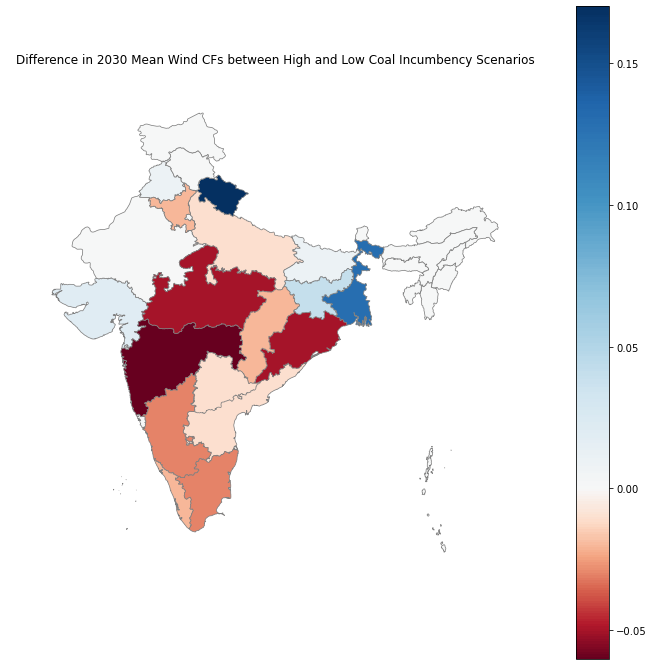

In [6]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_cf_summary_30['geometry']), 
    hue=wind_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize,
)
plt.title("Difference in 2030 Mean Wind CFs between High and Low Coal Incumbency Scenarios")

# for idx, row in wind_cf_summary_30.iterrows():
#     plt.annotate(s=idx)
    
fig = fig.get_figure()
fig.savefig('wind_cf_30_diff')

## Wind 2047 CF 

In [7]:
vmin, vmax = wind_cf_summary_47['diff'].min(), wind_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

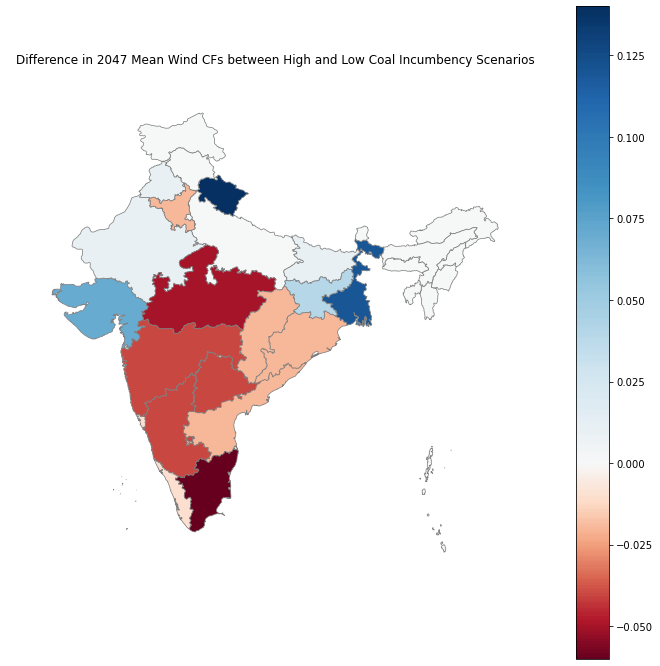

In [8]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_cf_summary_47['geometry']), 
    hue=wind_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2047 Mean Wind CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('wind_cf_47_diff')

## Wind CF Diff

In [9]:
vmin, vmax = wind_cf_diff['diff'].min(), wind_cf_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

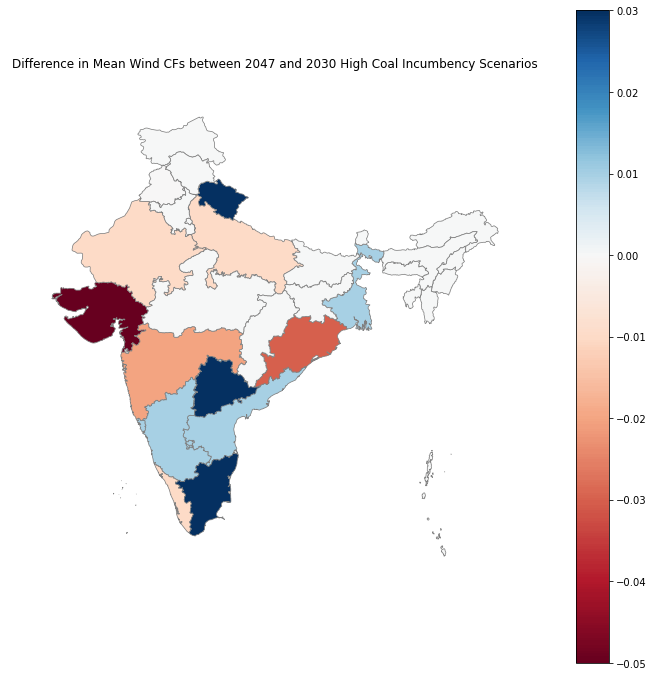

In [10]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_cf_diff['geometry']), 
    hue=wind_cf_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in Mean Wind CFs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('wind_cf_diff')

## Wind 2030 LCOE

In [11]:
vmin, vmax = wind_lcoe_summary_30['diff'].min(), wind_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

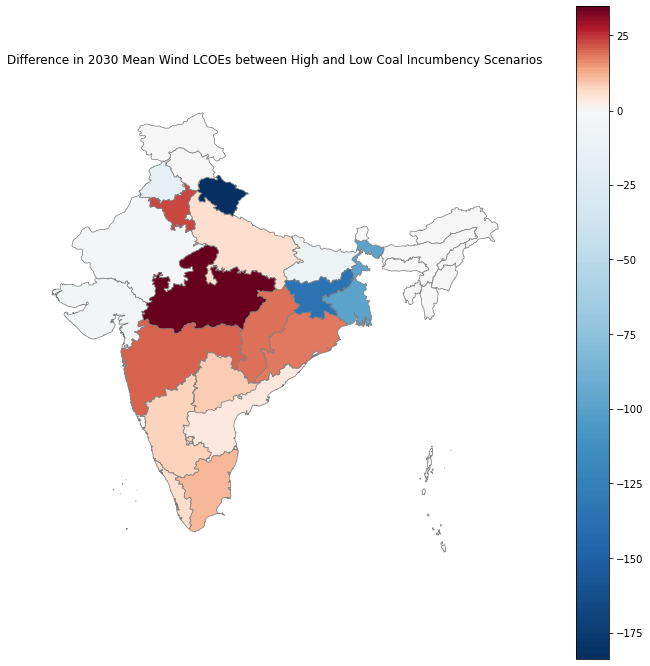

In [12]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_lcoe_summary_30['geometry']), 
    hue=wind_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2030 Mean Wind LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('wind_lcoe_30_diff')

## Wind 2047 LCOE

In [13]:
vmin, vmax = wind_lcoe_summary_47['diff'].min(), wind_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

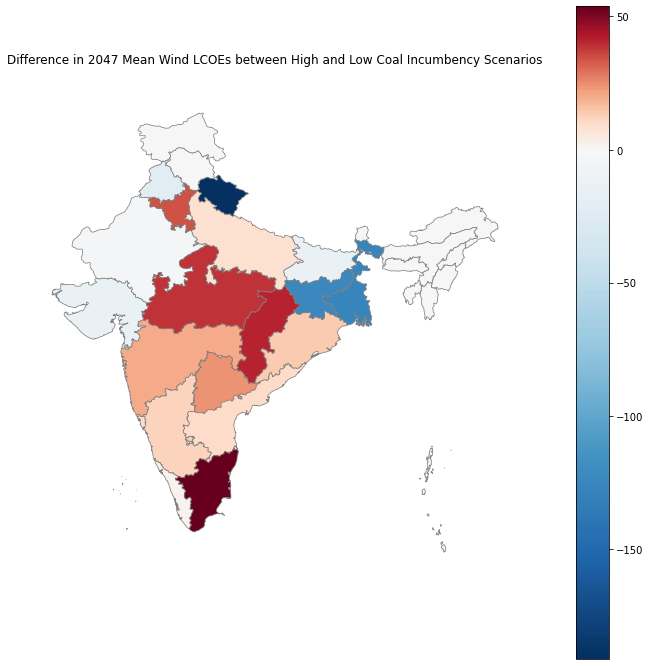

In [14]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_lcoe_summary_47['geometry']), 
    hue=wind_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2047 Mean Wind LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('wind_lcoe_47_diff')

## Wind LCOE Diff

In [15]:
vmin, vmax = wind_lcoe_diff['diff'].min(), wind_lcoe_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

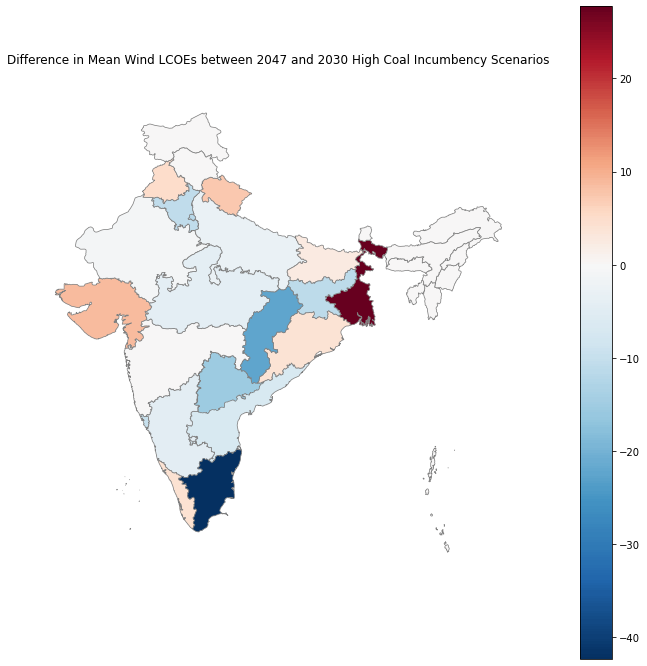

In [16]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_lcoe_diff['geometry']), 
    hue=wind_lcoe_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in Mean Wind LCOEs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('wind_lcoe_diff')

## Solar 2030 CF 

In [17]:
vmin, vmax = solar_cf_summary_30['diff'].min(), solar_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

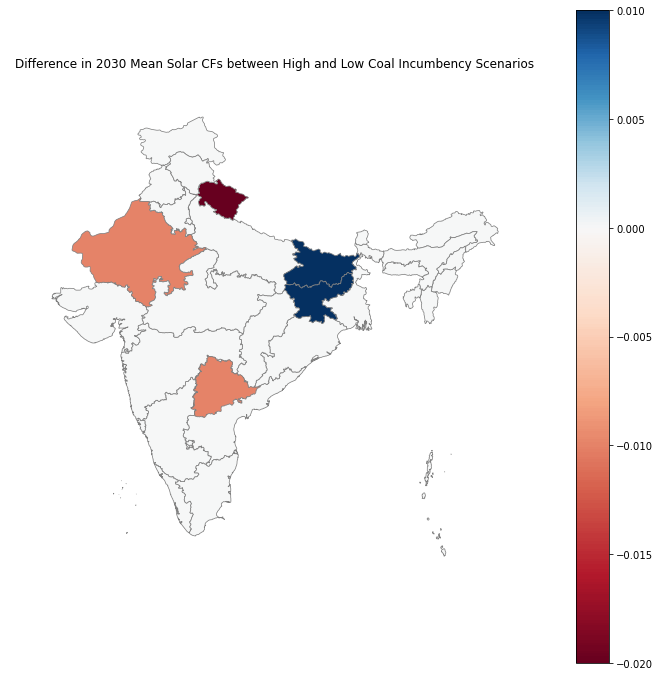

In [18]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_cf_summary_30['geometry']), 
    hue=solar_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2030 Mean Solar CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_cf_30_diff')

## Solar 2047 CF 

In [19]:
vmin, vmax = solar_cf_summary_47['diff'].min(), solar_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

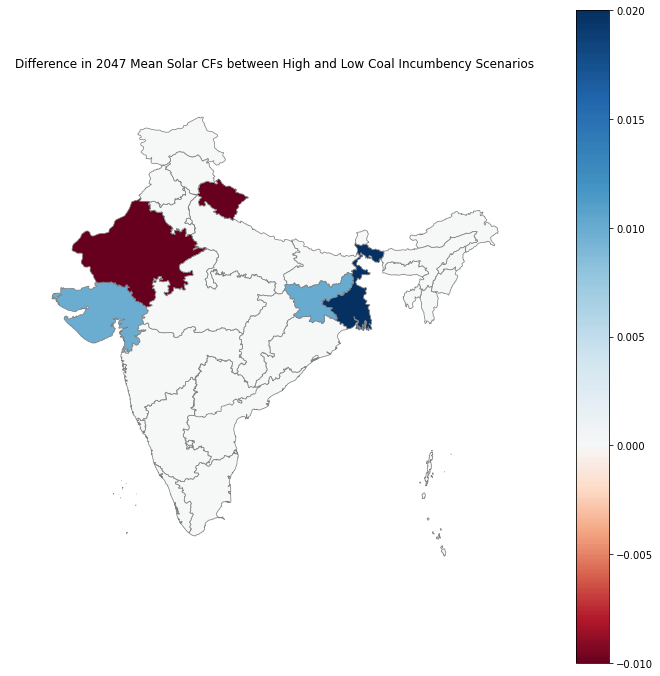

In [20]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_cf_summary_47['geometry']), 
    hue=solar_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2047 Mean Solar CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_cf_47_diff')

## Solar CF Diff

In [21]:
vmin, vmax = solar_cf_diff['diff'].min(), solar_cf_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

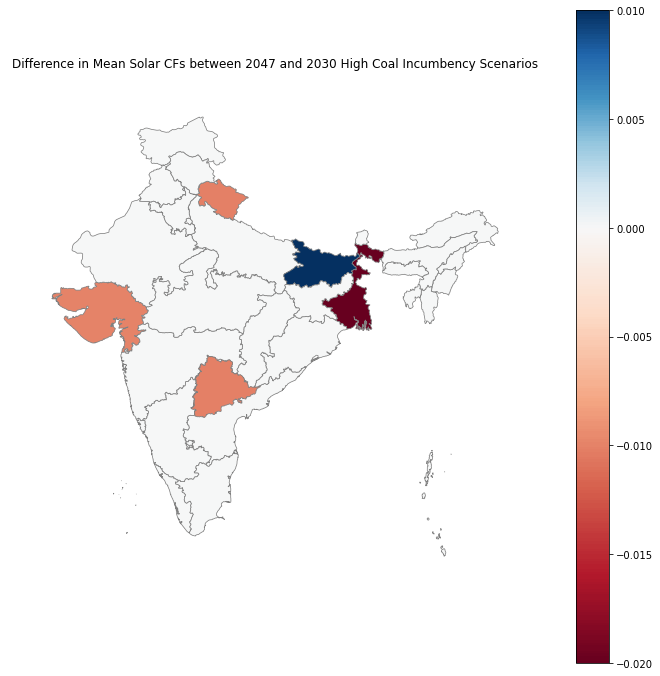

In [22]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_cf_diff['geometry']), 
    hue=solar_cf_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in Mean Solar CFs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_cf_diff')

## Solar 2030 LCOE

In [23]:
vmin, vmax = solar_lcoe_summary_30['diff'].min(), solar_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

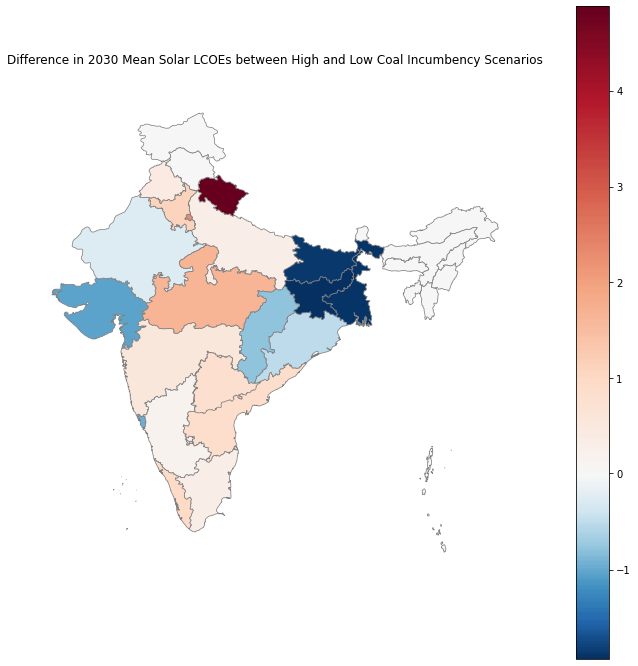

In [24]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_lcoe_summary_30['geometry']), 
    hue=solar_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2030 Mean Solar LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_lcoe_30_diff')

## Solar 2047 LCOE

In [25]:
vmin, vmax = solar_lcoe_summary_47['diff'].min(), solar_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

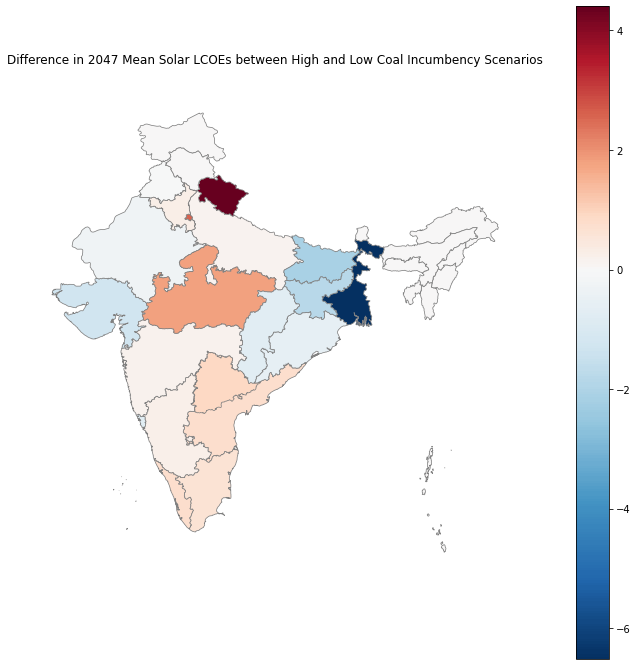

In [26]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_lcoe_summary_47['geometry']), 
    hue=solar_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2047 Mean Solar LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_lcoe_47_diff')

## Solar LCOE Diff

In [27]:
vmin, vmax = solar_lcoe_diff['diff'].min(), solar_lcoe_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

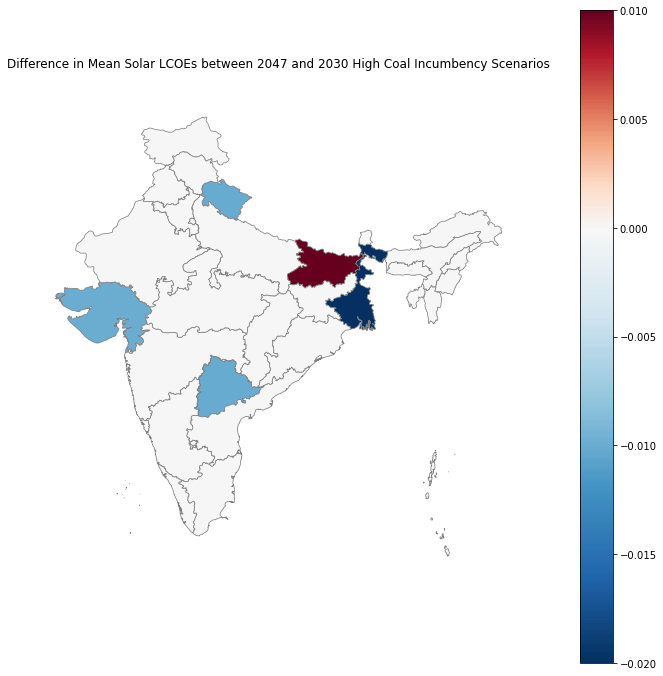

In [28]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_lcoe_diff['geometry']), 
    hue=solar_lcoe_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in Mean Solar LCOEs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('solar_lcoe_diff')

# Grid Averages EDA

In [29]:
grid_wind_cf_summary_30['diff'] = grid_wind_cf_summary_30['High'] - grid_wind_cf_summary_30['Low']
grid_wind_cf_summary_47['diff'] = grid_wind_cf_summary_47['High'] - grid_wind_cf_summary_47['Low']
grid_wind_lcoe_summary_30['diff'] = grid_wind_lcoe_summary_30['High'] - grid_wind_lcoe_summary_30['Low']
grid_wind_lcoe_summary_47['diff'] = grid_wind_lcoe_summary_47['High'] - grid_wind_lcoe_summary_47['Low']
grid_solar_cf_summary_30['diff'] = grid_solar_cf_summary_30['High'] - grid_solar_cf_summary_30['Low']
grid_solar_cf_summary_47['diff'] = grid_solar_cf_summary_47['High'] - grid_solar_cf_summary_47['Low']
grid_solar_lcoe_summary_30['diff'] = grid_solar_lcoe_summary_30['High'] - grid_solar_lcoe_summary_30['Low']
grid_solar_lcoe_summary_47['diff'] = grid_solar_lcoe_summary_47['High'] - grid_solar_lcoe_summary_47['Low']

grid_wind_cf_diff = grid_wind_cf_summary_30 - grid_wind_cf_summary_47
grid_solar_cf_diff = grid_solar_cf_summary_30 - grid_solar_cf_summary_47
grid_wind_lcoe_diff = grid_wind_lcoe_summary_30 - grid_wind_lcoe_summary_47
grid_solar_lcoe_diff = grid_solar_cf_summary_30 - grid_solar_cf_summary_47

grid_wind_cf_summary_30['geometry'] = pd.Series(grid_states)
grid_wind_cf_summary_47['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_summary_30['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_summary_47['geometry'] = pd.Series(grid_states)
grid_solar_cf_summary_30['geometry'] = pd.Series(grid_states)
grid_solar_cf_summary_47['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_summary_30['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_summary_47['geometry'] = pd.Series(grid_states)
grid_wind_cf_diff['geometry'] = pd.Series(grid_states)
grid_solar_cf_diff['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_diff['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_diff['geometry'] = pd.Series(grid_states)

## Wind 2030 CF 

In [30]:
vmin, vmax = grid_wind_cf_summary_30['diff'].min(), grid_wind_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

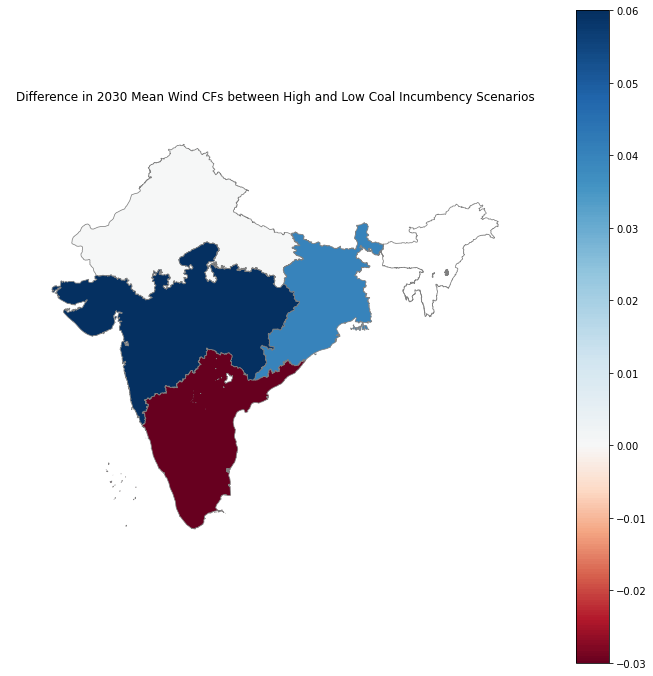

In [31]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_cf_summary_30['geometry']), 
    hue=grid_wind_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2030 Mean Wind CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_cf_30_diff')

## Wind 2047 CF 

In [32]:
vmin, vmax = grid_wind_cf_summary_47['diff'].min(), grid_wind_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

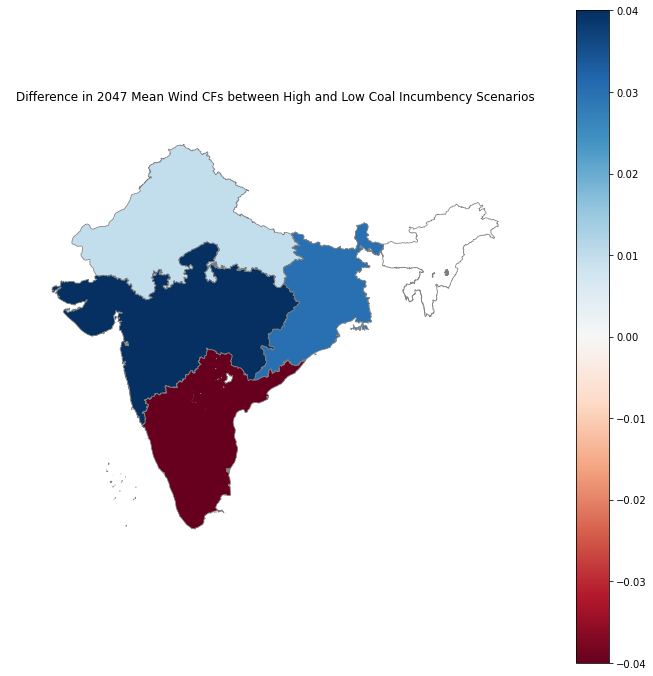

In [33]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_cf_summary_47['geometry']), 
    hue=grid_wind_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2047 Mean Wind CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_cf_47_diff')

## Wind CF Diff

In [34]:
vmin, vmax = grid_wind_cf_diff['diff'].min(), grid_wind_cf_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

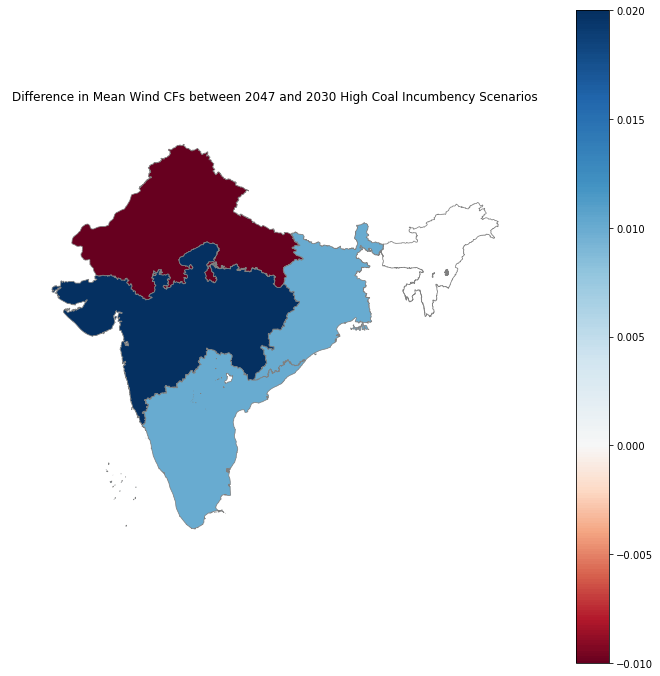

In [35]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_cf_diff['geometry']), 
    hue=grid_wind_cf_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in Mean Wind CFs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_cf_diff')

## Wind 2030 LCOE

In [36]:
vmin, vmax = grid_wind_lcoe_summary_30['diff'].min(), grid_wind_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

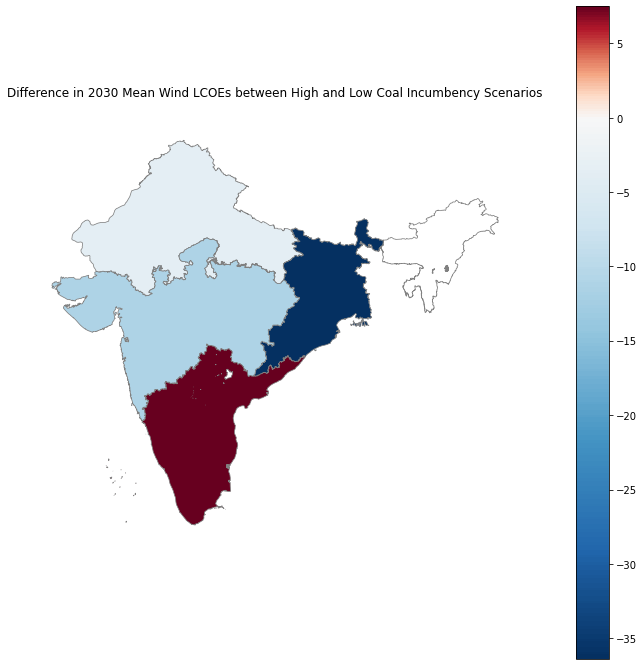

In [37]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_lcoe_summary_30['geometry']), 
    hue=grid_wind_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2030 Mean Wind LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_lcoe_30_diff')

## Wind 2047 LCOE

In [38]:
vmin, vmax = grid_wind_lcoe_summary_47['diff'].min(), grid_wind_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

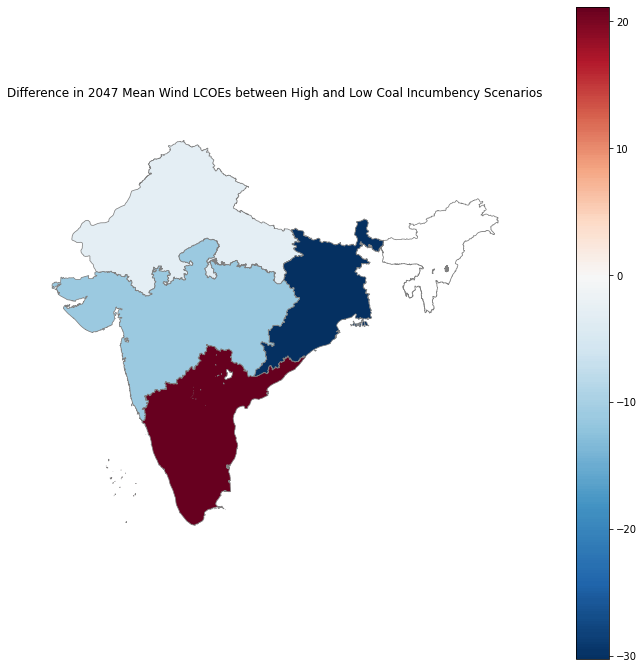

In [39]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_lcoe_summary_47['geometry']), 
    hue=grid_wind_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2047 Mean Wind LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_lcoe_47_diff')

## Wind LCOE Diff

In [40]:
vmin, vmax = grid_wind_lcoe_diff['diff'].min(), grid_wind_lcoe_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

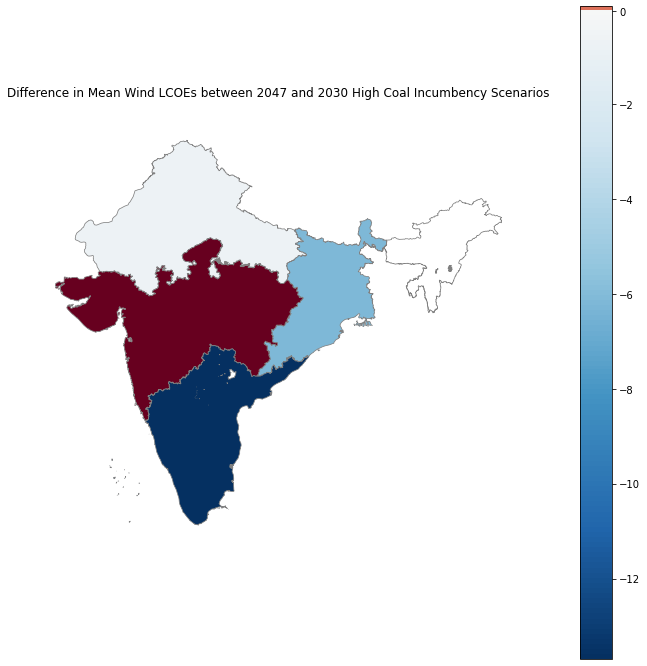

In [41]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_lcoe_diff['geometry']), 
    hue=grid_wind_lcoe_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in Mean Wind LCOEs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_wind_lcoe_diff')

## Solar 2030 CF 

In [42]:
vmin, vmax = grid_solar_cf_summary_30['diff'].min(), grid_solar_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

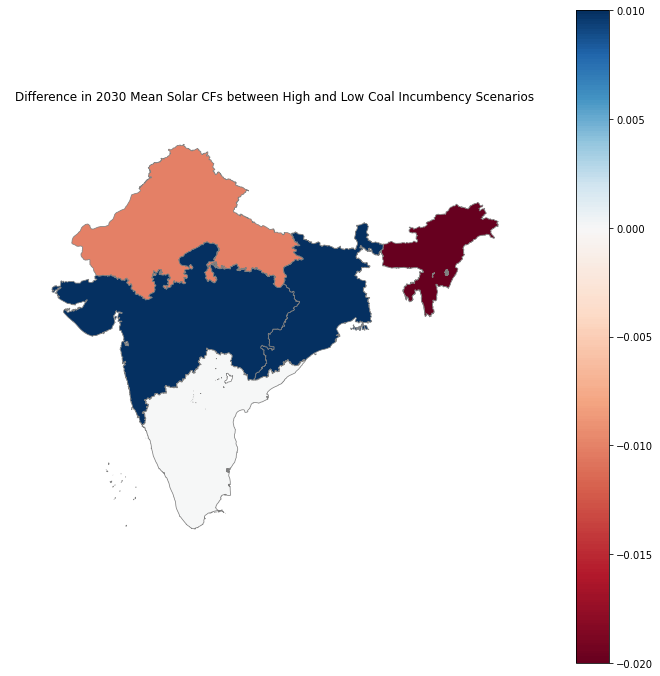

In [43]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_cf_summary_30['geometry']), 
    hue=grid_solar_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2030 Mean Solar CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_cf_30_diff')

## Solar 2047 CF 

In [44]:
vmin, vmax = grid_solar_cf_summary_47['diff'].min(), grid_solar_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

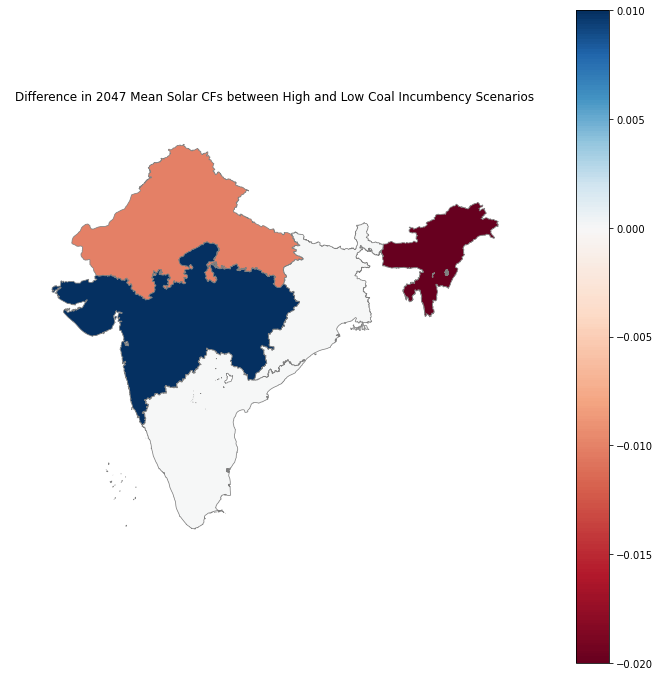

In [45]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_cf_summary_47['geometry']), 
    hue=grid_solar_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in 2047 Mean Solar CFs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_cf_47_diff')

## Solar CF Diff

In [46]:
vmin, vmax = grid_solar_cf_diff['diff'].min()-0.0001, grid_solar_cf_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

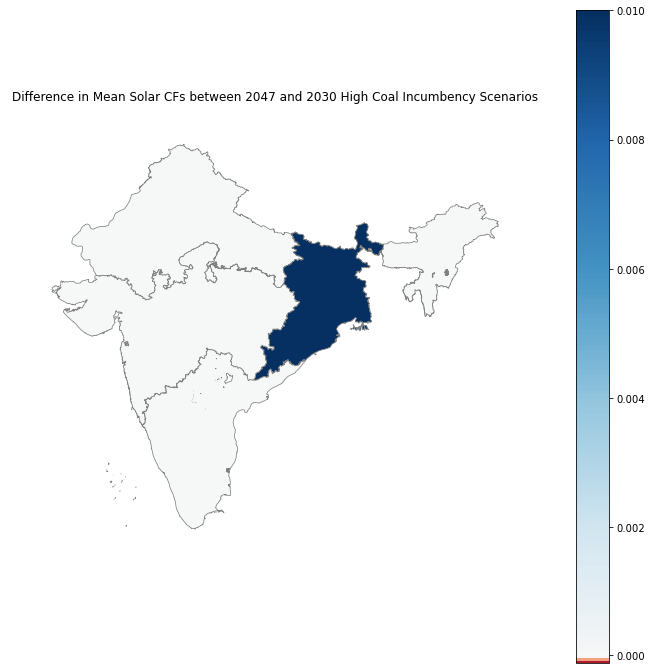

In [47]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_cf_diff['geometry']), 
    hue=grid_solar_cf_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)
plt.title("Difference in Mean Solar CFs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_cf_diff')

## Solar 2030 LCOE

In [48]:
vmin, vmax = grid_solar_lcoe_summary_30['diff'].min(), grid_solar_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

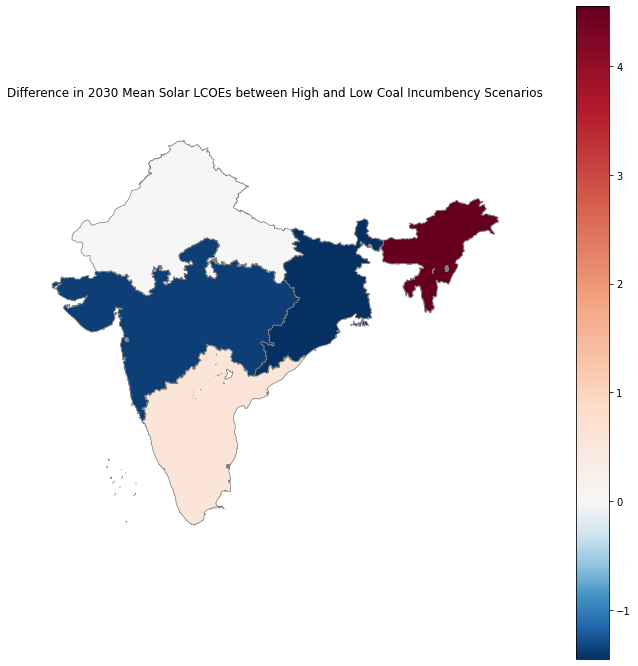

In [49]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_lcoe_summary_30['geometry']), 
    hue=grid_solar_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2030 Mean Solar LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_lcoe_30_diff')

## Solar 2047 LCOE

In [50]:
vmin, vmax = grid_solar_lcoe_summary_47['diff'].min(), grid_solar_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

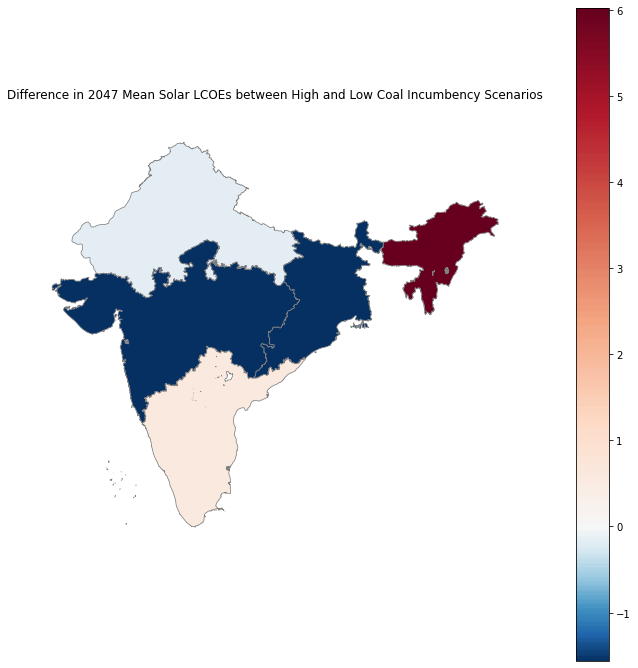

In [51]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_lcoe_summary_47['geometry']), 
    hue=grid_solar_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in 2047 Mean Solar LCOEs between High and Low Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_lcoe_47_diff')

## Solar LCOE Diff

In [52]:
vmin, vmax = grid_solar_lcoe_diff['diff'].min()-0.0001, grid_solar_lcoe_diff['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

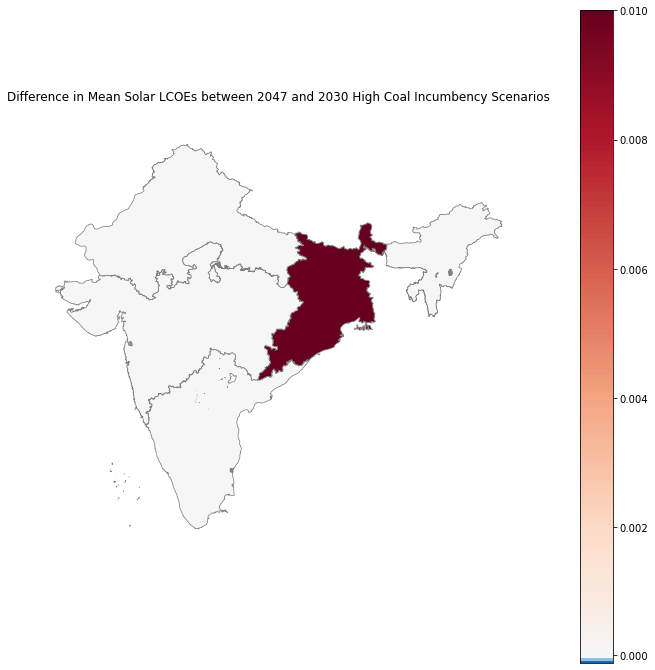

In [53]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_lcoe_diff['geometry']), 
    hue=grid_solar_lcoe_diff['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)
plt.title("Difference in Mean Solar LCOEs between 2047 and 2030 High Coal Incumbency Scenarios")
fig = fig.get_figure()
fig.savefig('grid_solar_lcoe_diff')